## Dimensionality Reduction and Cluster Analysis using Sklearn


Dimension Reduction refers to the process of converting a set of data having vast dimensions(Features) into data with lesser dimensions ensuring that it conveys similar information concisely. These techniques are typically used while solving machine learning problems to obtain better features for a classification or regression task.

Some of the benefits of Dimension Reduction:
1. It helps in data compressing and reducing the storage space required
2. It fastens the time required for performing same computations.
3. It is helpful in noise(outliers) remova, and as result of that we can improve the performance of models
4. Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. 

The dataset I am using for illustration is Glass dataset.
https://archive.ics.uci.edu/ml/datasets/glass+identification

This dataset consist of 214 instances with 10 features(Dimensions). The target of 7 different glass categories. The main objective of this dataset is to classify data into 7 differnt glass category.


In [105]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [106]:
data=pd.read_csv("glass..csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [113]:
features=data.drop(columns=10)
labels= data.loc[:,10]
features.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


#### Principal Component Analysis(PCA): 
PCA is one of the technique applied to reduce dimensions in data before applying to other machine learning algorithmn.
In this technique, variables are transformed into a new set of variables, which are linear combination of original variables. These new set of variables are known as principle components. They are obtained in such a way that first principle component accounts for most of the possible variation of original data after which each succeeding component has the highest possible variance.The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. 


In [114]:
pca=PCA(n_components=2)
pca.fit(features)
newfeatures = pca.transform(features)
pca.explained_variance_ratio_

array([  9.98645889e-01,   6.70688948e-04])

We see that the first PC already explains almost 99% of the variance

Now Lets plot the graph using these two principal components

In [115]:
newfeaturesdf = pd.DataFrame(newfeatures)

newfeaturesdf.columns = ['PC1','PC2']
newfeaturesdf.head()

,PC1,PC2
0,-106.513982,-0.095596
1,-105.499556,-0.618874
2,-104.499923,-0.612527
3,-103.504127,-0.249594
4,-102.503065,-0.383210


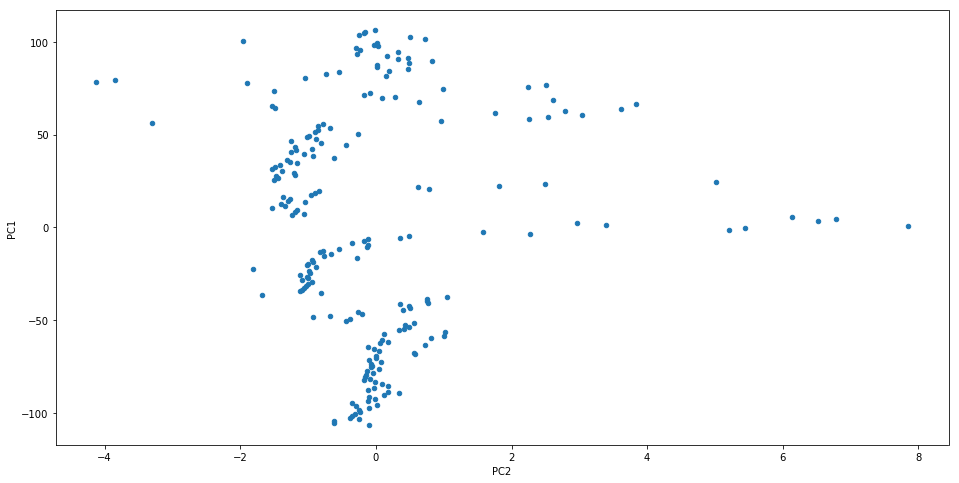

In [116]:
%matplotlib inline
    
ax = newfeaturesdf.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    


Now Let's create a bubble chart,points/values proportional to the mean value for all the features. First we need to add a new column containing the noramlized mean per datapoint.

In [117]:
newfeaturesdf['feature_mean'] = pd.Series(features.mean(axis=1), index=newfeaturesdf.index)

X = newfeaturesdf['feature_mean']
scaler = MinMaxScaler(feature_range=(0, 1))
normalized =scaler.fit_transform(X.values.reshape(-1,1))
newfeaturesdf['feature_mean_norm']=normalized

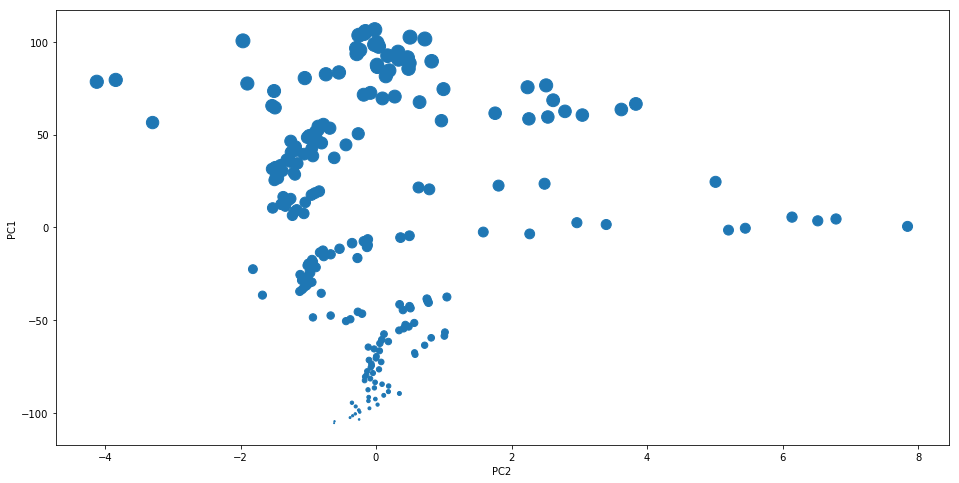

In [118]:
newfeaturesdf.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=newfeaturesdf['feature_mean_norm']*200, 
    figsize=(16,8))

As we can see from the above graph,lot of variations we can see in PC1/y direction. Using just two principal components we are able to identify different clusters of data points.


Similarly we can also add all the features and noramlize it, to see if same behaviour exists

In [119]:
newfeaturesdf['feature_sum'] = pd.Series(features.sum(axis=1), index=newfeaturesdf.index)
X = newfeaturesdf['feature_sum']
scaler = MinMaxScaler(feature_range=(0, 1))
normalized =scaler.fit_transform(X.values.reshape(-1,1))
newfeaturesdf['feature_sum_norm']=normalized

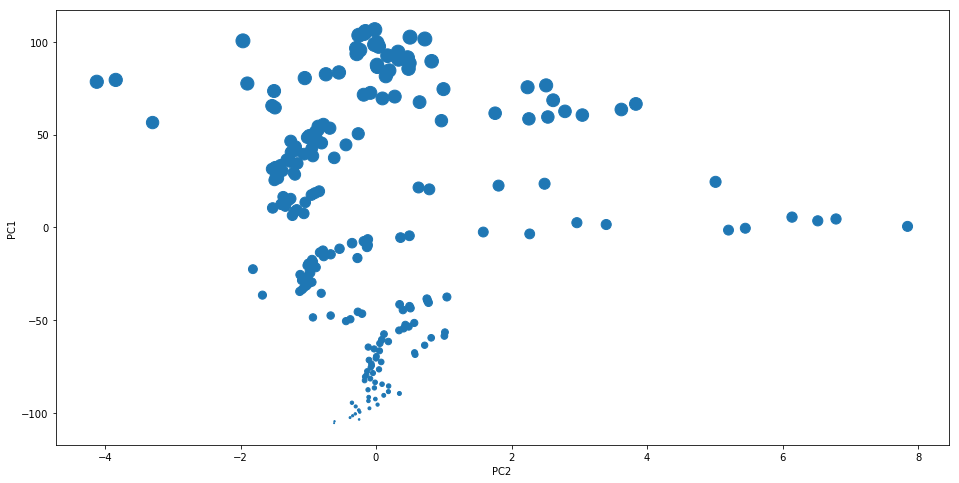

In [120]:
newfeaturesdf.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=newfeaturesdf['feature_sum_norm']*200, 
    figsize=(16,8))

As we can see from the above graph,lot of variations we can see in PC1/y direction. Using just two principal components we are able to identify different clusters of data points.


### Cluster Analysis on Dimensionally reduced data vs actual data

Now let us apply kMeans Clustering on the two principal components we obtained by applying PCA and then using actual data. we will see if dimensionally reduced data can replace actual data in cluster analysis. 

First, we will apply clustering algorithm to actual data , store the cluster result  as a feature, and plot the graph

In [121]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=7)
clusters = kmeans.fit(features)
clusters.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [122]:
features['cluster'] = pd.Series(clusters.labels_, index=features.index)

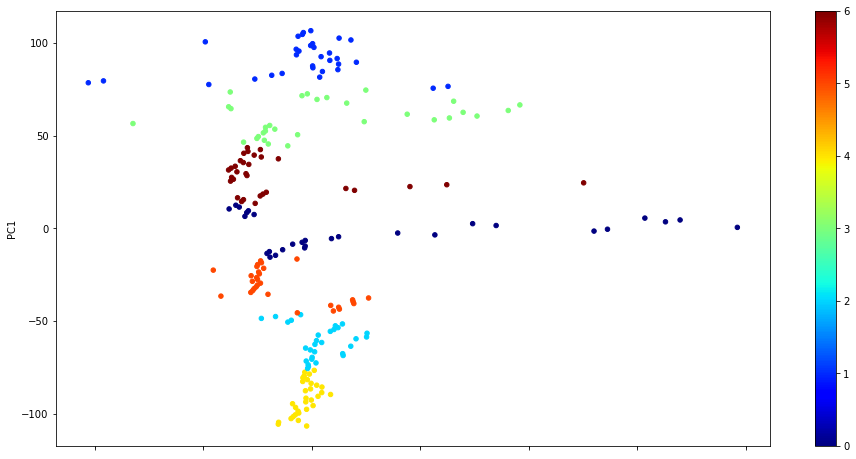

In [133]:
import numpy as np
newfeaturesdf.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=features.cluster.astype(np.float), 
        cmap="jet",
        figsize=(16,8))

From the above graph, we can see few of the glass categories are well separated , while few others are not .

Now let us apply same KMeans clsutering algorithm on the principal comaponents obtained after applying PCA, and then plot the graph. we will then compare the results of both the graph.

In [136]:
newfeaturesdf = pd.DataFrame(newfeatures)
newfeaturesdf.columns = ['PC1','PC2']

clusters_pca = kmeans.fit(newfeaturesdf)
clusters_pca.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6], dtype=int32)

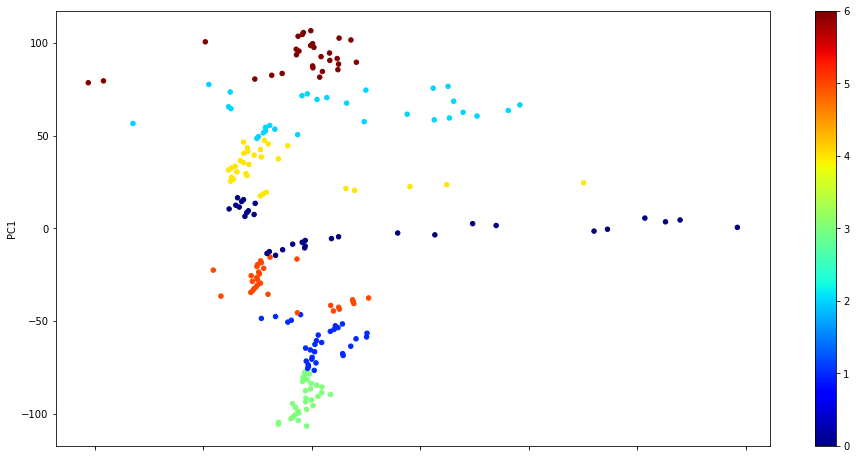

In [137]:
newfeaturesdf['cluster'] = pd.Series(clusters_pca.labels_, index=newfeaturesdf.index)
newfeaturesdf.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=newfeaturesdf.cluster.astype(np.float), 
        cmap="jet",
        figsize=(16,8))

Above graphs indicates, even using just two principal components we were able to achieve nearly same clustering as with actual data graph.This shows that applying PCA technique can significantly reduce computation time , while producing same or higher accuracy(by removing outliers) by creating few important features from original feature set. 

References:

https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/

http://scikit-learn.org/stable/modules/clustering.html